# Homework 4 - Duc Trinh

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split

## Exercise 1

### a)

In [2]:
def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

In [3]:
x_values = np.linspace(-10, 20, 1500)
y_values = curve_generator(x_values, 0.8)

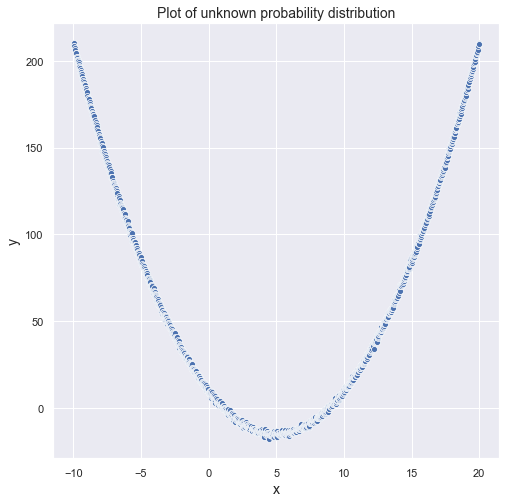

In [4]:
plt.figure(figsize = (8, 8))
plt.title(label = "Plot of unknown probability distribution", fontsize = 14)
plt.xlabel(xlabel = "x", fontsize = 14)
plt.ylabel(ylabel = "y", fontsize = 14)
_ = sns.scatterplot(x_values,y_values, sizes = 0.5)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state = 23)

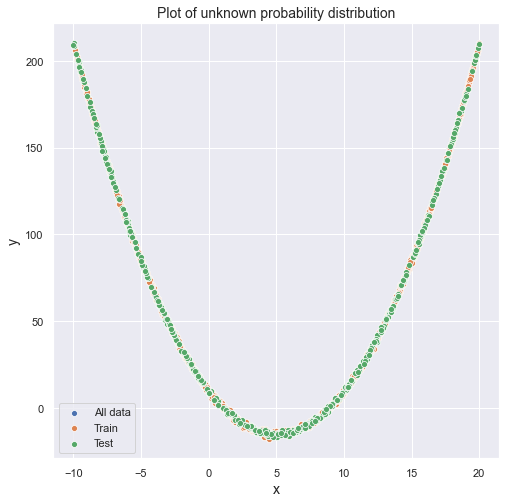

In [6]:
plt.figure(figsize = (8, 8))
plt.title(label = "Plot of unknown probability distribution", fontsize = 14)
plt.xlabel(xlabel = "x", fontsize = 14)
plt.ylabel(ylabel = "y", fontsize = 14)
_ = sns.scatterplot(x_values,y_values, sizes = 0.25, legend = "full")
_ = sns.scatterplot(x_train, y_train, sizes = 0.25, legend = "full")
_ = sns.scatterplot(x_test, y_test, sizes = 0.25, legend = "full")
_ = plt.legend(("All data", "Train", "Test"), loc = 0)

### b)

In [7]:
rmse_train = np.zeros(21)
rmse_test = np.zeros(21)

In [8]:
for i in range (0, 21):
    model = np.poly1d(np.polyfit(x_train, y_train, i))
    rmse_train[i] = np.sqrt(np.mean((y_train - model(x_train)) ** 2))
    rmse_test[i] = np.sqrt(np.mean((y_test - model(x_test)) ** 2))

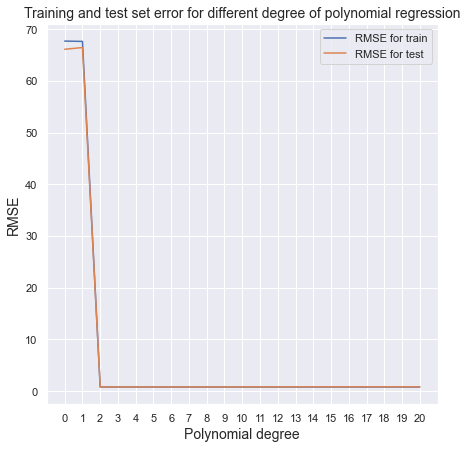

In [9]:
plt.figure(figsize = (7, 7))
plt.title(label = "Training and test set error for different degree of polynomial regression", fontsize = 14)
plt.xlabel(xlabel = "Polynomial degree", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(-1, 21)
plt.xticks(range(0,21))
_ = sns.lineplot(range(0, 21), rmse_train)
_ = sns.lineplot(range(0, 21), rmse_test)
_ = plt.legend(('RMSE for train', 'RMSE for test'), loc = 0)

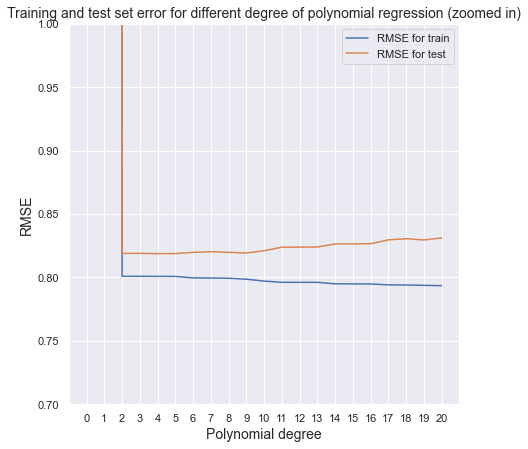

In [10]:
plt.figure(figsize = (7, 7))
plt.title(label = "Training and test set error for different degree of polynomial regression (zoomed in)", fontsize = 14)
plt.xlabel(xlabel = "Polynomial degree", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(-1, 21)
plt.xticks(range(0,21))
plt.ylim(0.7,1)
_ = sns.lineplot(range(0, 21), rmse_train)
_ = sns.lineplot(range(0, 21), rmse_test)
_ = plt.legend(('RMSE for train', 'RMSE for test'), loc = 0)

We can ignore the RMSE values for the polynomial degree 0 and 1 because it is quite clear that we are using polynomial degrees less than the real function, which would explain the massive drop in error when we get to polynomial value 2. The RMSE values for the polynomial degree 0 and 1 are only based on the variance of the training set versus the variance of the test set. In this case, it seems there is more variance in the training set than the test set, possibily due to there are more values in the training set. Otherwise, for any polynomial degree bigger than 1, it is quite clear that the test error is always higher than the training error. We are not Nate Silver after all. Furthermore, we can see that the training error is decreasing as an effect of the increase in polynomial degree that led to a more complex model. At the same time, we can see the effect of overfitting as our testing error increases as the model complexity/polynomial degree increases.

### c)

In [11]:
degrees = [1,2,5,10] #degree of models
sizes = range(500, 4250, 250) #the different original training set size

In [12]:
rmse_train= np.zeros((len(degrees), len(sizes)))
rmse_test = np.zeros((len(degrees), len(sizes)))

In [13]:
iterDeg = 0
iterSize = 0
for deg in degrees:
    for size in sizes:
        x_values = np.linspace(-10, 20, size)
        y_values = curve_generator(x_values, 0.8)
        x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state = 23)
        model = np.poly1d(np.polyfit(x_train, y_train, deg))
        rmse_train[iterDeg][iterSize] = np.sqrt(np.mean((y_train - model(x_train)) ** 2))
        rmse_test[iterDeg][iterSize] = np.sqrt(np.mean((y_test - model(x_test)) ** 2))
        iterSize = (iterSize+1)%len(sizes)
    iterDeg = (iterDeg+1)%len(degrees)

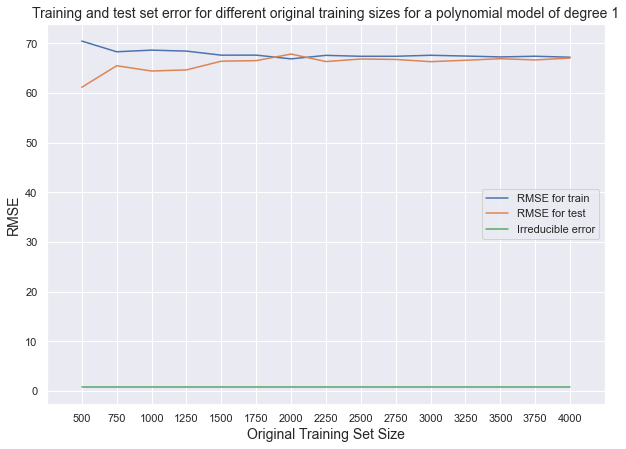

In [14]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 1", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[0])
_ = sns.lineplot(sizes, rmse_test[0])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

As expected from the previous part, with a polynomial model degree of size 1, we can see that the training error and the testing error are very big. They are both heavily reliance on the variance in the training set versus the test set. As the training set is always bigger than the test set, there seems to be a a higher variance in the training set in comparision to the test set. Hence, for almost all original training set size, the testing error is smaller than the training error for a polynomial of degree 1.

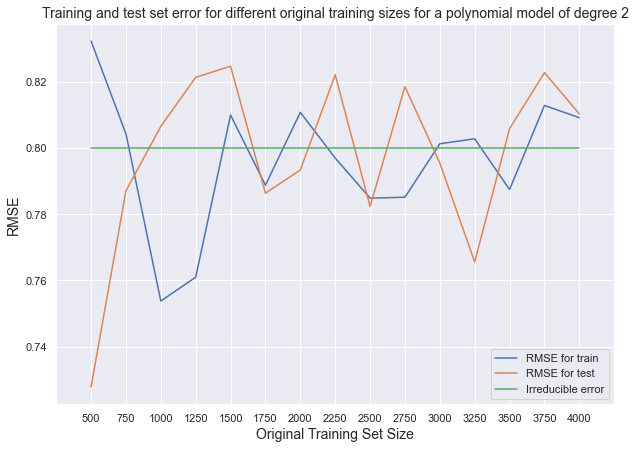

In [15]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 2", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[1])
_ = sns.lineplot(sizes, rmse_test[1])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

For a polynomial of degree 2, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

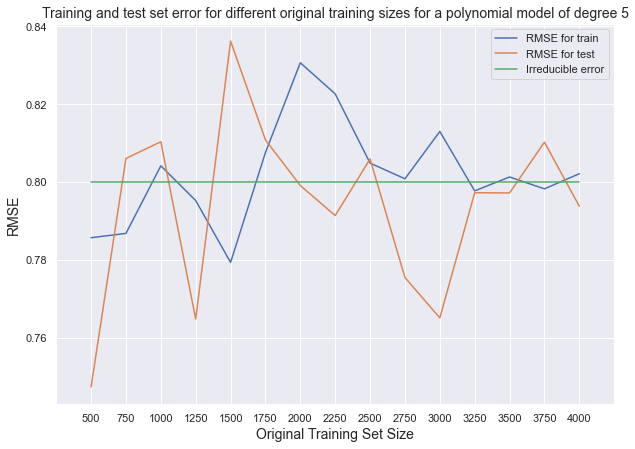

In [16]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 5", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[2])
_ = sns.lineplot(sizes, rmse_test[2])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

Similarly, for a polynomial of degree 5, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

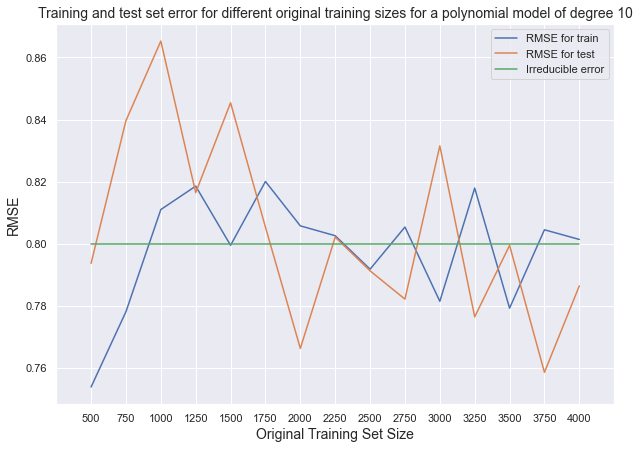

In [17]:
plt.figure(figsize = (10, 7))
plt.title(label = "Training and test set error for different original training sizes for a polynomial model of degree 10", fontsize = 14)
plt.xlabel(xlabel = "Original Training Set Size", fontsize = 14)
plt.ylabel(ylabel = "RMSE", fontsize = 14)
plt.xlim(250, 4250)
plt.xticks(sizes)
_ = sns.lineplot(sizes, rmse_train[3])
_ = sns.lineplot(sizes, rmse_test[3])
_ = sns.lineplot(sizes, (lambda x: 0.8)(sizes))
_ = plt.legend(('RMSE for train', 'RMSE for test','Irreducible error'), loc = 0)

Similarly, for a polynomial of degree 10, it seems that for most original training set sizes, the training error is smaller than the testing error. The absolute difference between the errors are not big. Furthermore, the training error and the testing error all seems to hover around the irreducible error, and do not seem to be able to go much lower than that. 

## Exercise 2

### a)

In [18]:
#These codes were tested on the Notebook provided by the Professor, but it will not run on Jupyter nor will it run on my own colab notebook so there are no figures on this
#I can guarantee that the code works though, and potentially could run on your machine
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
from PIL import Image
from PIL import ImageOps
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")

In [19]:
from keras.datasets import mnist

Using TensorFlow backend.


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

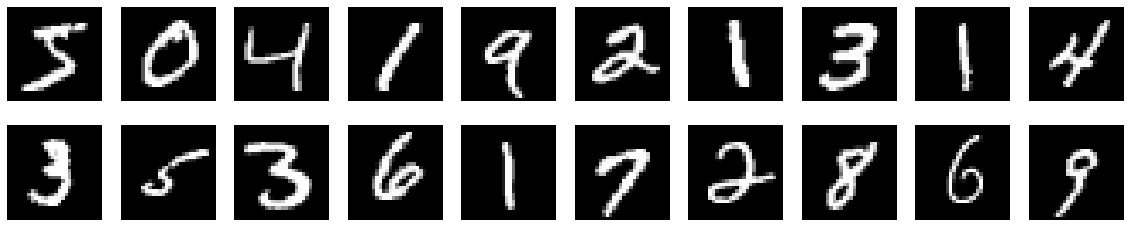

In [21]:
plt.figure(figsize=(20,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [22]:
from keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [24]:
#base model
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'

In [ ]:
#model with changed optimizer (from 'adam' to 'sgd')
model2 = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
#model with changed optimizer (from 'adam' to 'adamax')
model6 = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model6.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [ ]:
#model with changed activation function (from 'relu' to 'softmax')
model3 = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='softmax', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='softmax'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='softmax'),
    Dense(50, activation='softmax'),
    Dense(num_classes, activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model with changed dropout rate (from 0.2 to 0.5)
model4 = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model with changed dropout rate (from 0.2 to 0.1)
model5 = Sequential([
    Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
accuracy = []
train_percent = 0.05
iter = 20
for i in range(iter):
    model.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(score[1])

In [ ]:
accuracy2 = []
for i in range(iter):
    model2.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model2.evaluate(X_test, y_test, verbose=0)
    accuracy2.append(score[1])

In [ ]:
accuracy3 = []
for i in range(iter):
    model3.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model3.evaluate(X_test, y_test, verbose=0)
    accuracy3.append(score[1])

In [ ]:
accuracy4 = []
for i in range(iter):
    model4.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model4.evaluate(X_test, y_test, verbose=0)
    accuracy4.append(score[1])

In [ ]:
accuracy5 = []
for i in range(iter):
    model5.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model5.evaluate(X_test, y_test, verbose=0)
    accuracy5.append(score[1])

In [ ]:
accuracy6 = []
for i in range(iter):
    model6.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model6.evaluate(X_test, y_test, verbose=0)
    accuracy6.append(score[1])

In [ ]:
X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*60000),accuracy,"o-",label="Base model")
plt.plot(X*int(train_percent*60000),accuracy2,"o-",label="Using SGD Optimzer")
plt.plot(X*int(train_percent*60000),accuracy6,"o-",label="Using Adamax Optimzer")
plt.plot(X*int(train_percent*60000),accuracy3,"o-",label="Using softmax activation function")
plt.plot(X*int(train_percent*60000),accuracy4,"o-",label="Increased dropout rate")
plt.plot(X*int(train_percent*60000),accuracy5,"o-",label="Decreased dropout rate")
plt.legend(loc=0)
plt.grid()
_ = plt.xlabel("number of processed training instances")
_ = plt.ylabel("accuracy on the test set")

It seems like the model created using SGD optimizer performs slightly worse than the one created using the Adam optimizer. This model never reached the same accuracy level of the base model. Then, I tried the Adamax optimizer which also could not reach the same level of accuracy of the base model. However, in comparision to the model created using the SGD optimizer, it need to process less training instances to achieve a high accuracy.

The model created using 'softmax' as the activation function performs far worse than than the base model created. Its accuracy does not really improve even with the increase of training instances.

The model with increase drop out rate also suffers a drop in accuracy compared to the base model, but it still performs better than all the other models that we tried. It reaches the highest level of accuracy compare to the other models, and it requires the least amount of training instances to reach that accuracy. Then, I tried to decrease the drop out rate, and got a very similar model in accuracy. Eventually, it does reach the same level of accuracy to the model created with increase drop out rate (which means it still performs better than most models I tried). However, it requires to process more training instances to get to the same level of accuracy as the model with increase drop out rate.

### b)

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://math.bme.hu/~marcessz/images_dv/digits.jpg")
img = Image.open(BytesIO(response.content))
response2 = requests.get("https://i.imgur.com/nDr1puK.jpg")
img2 = Image.open(BytesIO(response2.content))

The model has pretty high accuracy according to the test set. When being tested with the real image given in the notebook, it still achieved pretty good results. Out of the 10 digits, for 8/10 digits the model's first or second prediction matches the digit. For 6/10 digits, the mode's first prediction is correct. Only for 2/10 digits (6 and 9) that the model's first and second prediction are off. What is interesting is that both of the time it does this, it guess 6 and 9 as 3 with a high confidence score, which seems to point that there is something the model is mistakening about the shape of these two digits as 3 (note than 6 and 9 have very similar shape, just inverted). Next, I will try this with my own handwriting to see if there is a trend here.

In [ ]:
img2

In [ ]:
thresholds2 = {}
thresholds2[ 0 ] = ( 125 , 120 , 125+338 , 458 )
thresholds2[ 1 ] = ( 600 , 120 , 600+338 , 458 )
thresholds2[ 2 ] = ( 1050 , 120 , 1050+338 , 458 )
thresholds2[ 3 ] = ( 1520 , 120 , 1520+338 , 458 )
thresholds2[ 4 ] = ( 2040 , 120 , 2040+338 , 458 )
thresholds2[ 5 ] = ( 125 , 640 , 125+276 , 916 )
thresholds2[ 6 ] = ( 590 , 640 , 590+276 , 916 )
thresholds2[ 7 ] = ( 1100 , 640 , 1100+276 , 916 )
thresholds2[ 8 ] = ( 1540 , 640 , 1540+276 , 916 )
thresholds2[ 9 ] = ( 2060 , 640 , 2060+276 , 916 )

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    image = img2
    width, height = image.size
    image = image.crop( thresholds2[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

In [ ]:
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = img2
    width, height = image.size
    image = image.crop( thresholds2[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( 1 , 1 , 28 , 28 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

The model is still showing quite a high accuracy in guessing my handwriting. Out of the 10 digits, for 8/10 digits the model's first or second prediction matches the digit. For 7/10 digits, the mode's first prediction is correct. Only for 3/10 digits (6, 7, and 9) that the model's prediction seems off. Once again, we see our model struggling with the digit 6 and 9, even though this time it only mistakes 9 as 3 with high confidence. I wonder what features of these numbers that make the model struggle so much. I still think it is something in their similar shape that is confusing the model. I do not know why the model predicts my 7 as a 5. For its second guess of 7, the model predicts 1, which is somewhat close to the the shape of 7, but I do not get why it guess 5 as its first prediction.